In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Подключаем Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Загружаем файл
file_path = '/content/drive/My Drive/ST14000NM001G.csv'
df = pd.read_csv(file_path)
df

,date,serial_number,model,capacity_bytes,failure,smart_5_raw,smart_9_raw,smart_187_raw,smart_188_raw,smart_192_raw,smart_197_raw,smart_198_raw,smart_199_raw,smart_240_raw,smart_241_raw,smart_242_raw
0,2020-11-14,ZL201VZX,ST14000NM001G,14000519643136,0,0.0,23.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,2.406400e+04
1,2020-11-15,ZL201VZX,ST14000NM001G,14000519643136,0,0.0,55.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,3.451200e+04
2,2020-11-16,ZL201VZX,ST14000NM001G,14000519643136,0,0.0,70.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,3.744000e+04
3,2020-11-17,ZL201VZX,ST14000NM001G,14000519643136,0,0.0,85.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,4.036800e+04
4,2020-11-18,ZL201VZX,ST14000NM001G,14000519643136,0,0.0,117.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,5.139200e+04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7320137,2022-12-27,ZTM096M0,ST14000NM001G,14000519643136,0,0.0,13755.0,0.0,0.0,0.0,0.0,0.0,0.0,13067.0,9.432543e+10,1.611121e+11
7320138,2022-12-28,ZTM096M0,ST14000NM001G,14000519643136,0,0.0,13787.0,0.0,0.0,0.0,0.0,0.0,0.0,13098.0,9.442932e+10,1.616432e+11
7320139,2022-12-29,ZTM096M0,ST14000NM001G,14000519643136,0,0.0,13804.0,0.0,0.0,0.0,0.0,0.0,0.0,13115.0,9.448499e+10,1.619176e+11
7320140,2022-12-30,ZTM096M0,ST14000NM001G,14000519643136,0,0.0,13836.0,0.0,0.0,0.0,0.0,0.0,0.0,13146.0,9.463098e+10,1.622885e+11


In [3]:
df.isnull().sum()

,0
date,0
serial_number,0
model,0
capacity_bytes,0
failure,0
smart_5_raw,0
smart_9_raw,0
smart_187_raw,0
smart_188_raw,0
smart_192_raw,0


In [4]:
df.dtypes

,0
date,object
serial_number,object
model,object
capacity_bytes,int64
failure,int64
smart_5_raw,float64
smart_9_raw,float64
smart_187_raw,float64
smart_188_raw,float64
smart_192_raw,float64


In [5]:
df.nunique()

,0
date,828
serial_number,10927
model,1
capacity_bytes,1
failure,2
smart_5_raw,1708
smart_9_raw,20416
smart_187_raw,258
smart_188_raw,2364
smart_192_raw,69


In [6]:
df = df.drop(['model', 'capacity_bytes'], axis=1)

In [7]:
df['date'] = pd.to_datetime(df['date'])
df['serial_number'] = df['serial_number'].astype("string")

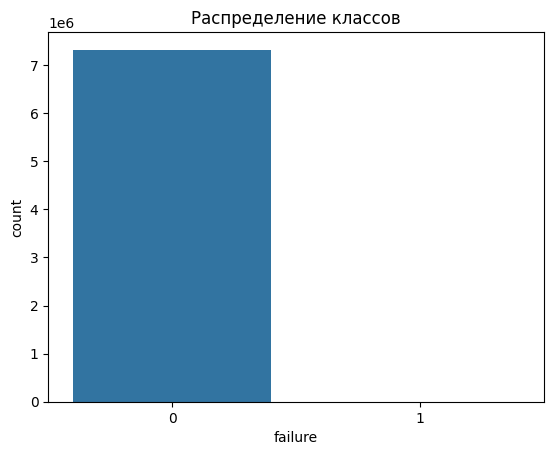

In [8]:
import seaborn as sns
sns.countplot(x='failure', data=df)
plt.title('Распределение классов')
plt.show()

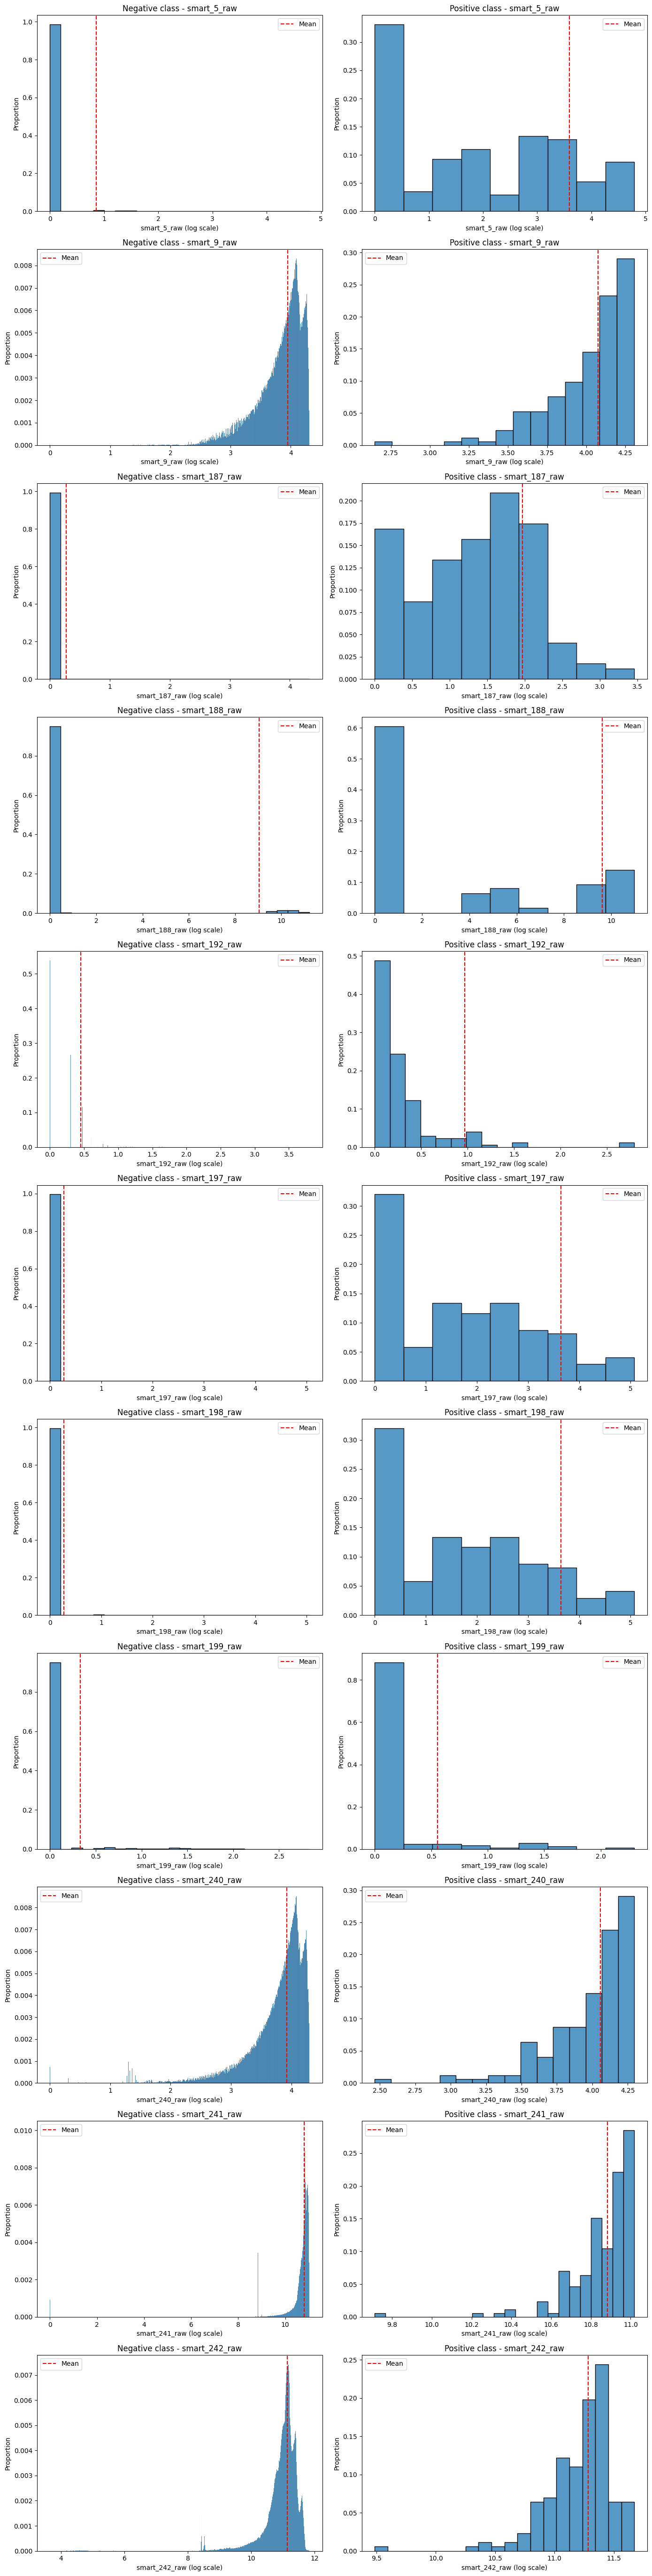

In [9]:
features = ['smart_5_raw', 'smart_9_raw', 'smart_187_raw', 'smart_188_raw', 'smart_192_raw', 'smart_197_raw', 'smart_198_raw', 'smart_199_raw', 'smart_240_raw', 'smart_241_raw', 'smart_242_raw']
target = 'failure'

# Настройка графиков
fig, axs = plt.subplots(len(features), 2, figsize=(14, 5*len(features)))

# Построение графиков для каждого признака
for i, feature in enumerate(features):
    for j, label in enumerate([0, 1]):
        subset = df[df[target] == label]
        ax = sns.histplot(np.log10(subset[feature] + 1), kde=False, ax=axs[i][j], stat='probability')
        ax.axvline(np.log10(subset[feature].mean() + 1), color='r', linestyle='--', label='Mean')

        if j == 0:
            axs[i][j].set_title(f'Negative class - {feature}')
        else:
            axs[i][j].set_title(f'Positive class - {feature}')

        axs[i][j].set(xlabel=f'{feature} (log scale)', ylabel='Proportion')
        axs[i][j].legend()

plt.tight_layout()
plt.show()

In [10]:
from sklearn.preprocessing import StandardScaler
features = ['smart_5_raw', 'smart_9_raw', 'smart_187_raw', 'smart_188_raw', 'smart_192_raw', 'smart_198_raw', 'smart_199_raw', 'smart_240_raw', 'smart_241_raw', 'smart_242_raw']
# Z-Score Normalization
scaler_z = StandardScaler()
df[features] = scaler_z.fit_transform(df[features])
df.head()

,date,serial_number,failure,smart_5_raw,smart_9_raw,smart_187_raw,smart_188_raw,smart_192_raw,smart_197_raw,smart_198_raw,smart_199_raw,smart_240_raw,smart_241_raw,smart_242_raw
0,2020-11-14,ZL201VZX,0,-0.018321,-1.681505,-0.012435,-0.159261,-0.031235,0.0,-0.005951,-0.07988,-1.611073,-2.515577,-1.391211
1,2020-11-15,ZL201VZX,0,-0.018321,-1.675405,-0.012435,-0.159261,-0.031235,0.0,-0.005951,-0.07988,-1.611073,-2.515577,-1.391211
2,2020-11-16,ZL201VZX,0,-0.018321,-1.672546,-0.012435,-0.159261,-0.031235,0.0,-0.005951,-0.07988,-1.611073,-2.515577,-1.391211
3,2020-11-17,ZL201VZX,0,-0.018321,-1.669687,-0.012435,-0.159261,-0.031235,0.0,-0.005951,-0.07988,-1.611073,-2.515577,-1.391211
4,2020-11-18,ZL201VZX,0,-0.018321,-1.663588,-0.012435,-0.159261,-0.031235,0.0,-0.005951,-0.07988,-1.611073,-2.515577,-1.391211


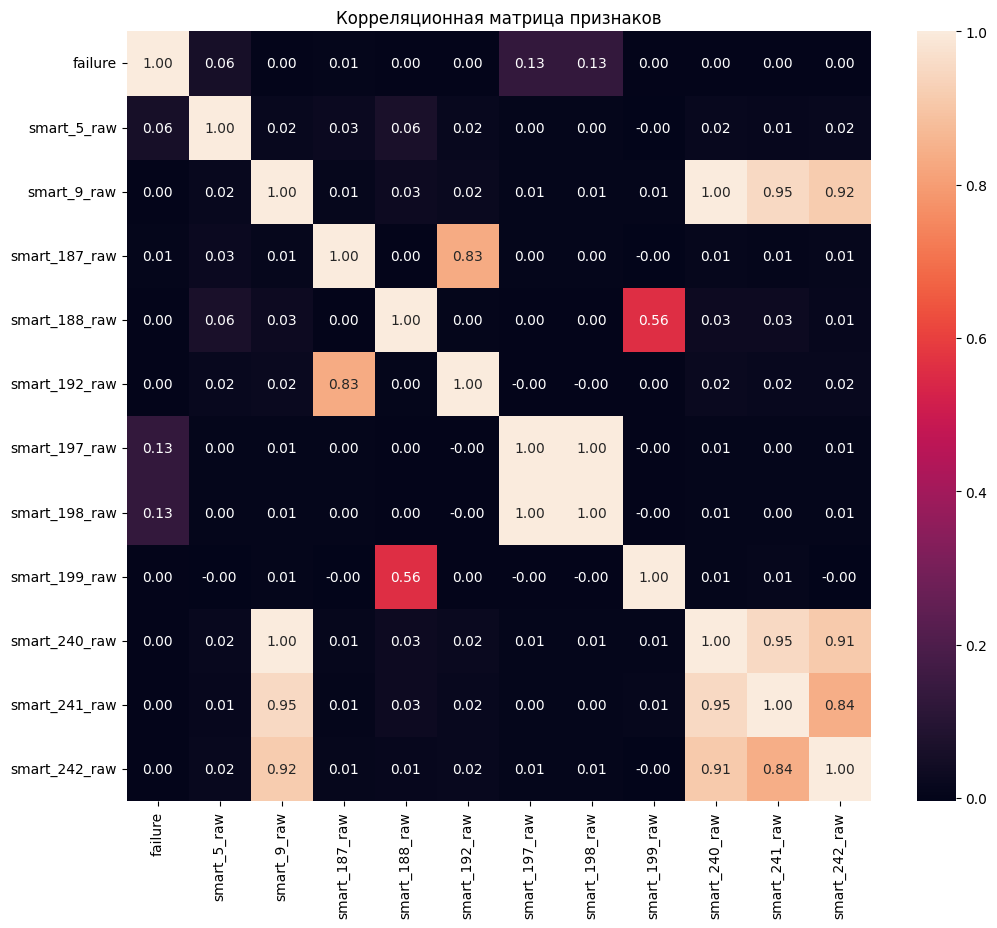

In [11]:
# Корреляционная матрица
correlation_matrix = df.corr(numeric_only=True)
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f')
plt.title('Корреляционная матрица признаков')
plt.show()

In [12]:
from sklearn.model_selection import train_test_split
# Выделим целевую переменную и выбранные признаки
X = df[['smart_5_raw', 'smart_9_raw', 'smart_187_raw', 'smart_188_raw', 'smart_192_raw', 'smart_197_raw', 'smart_198_raw', 'smart_199_raw', 'smart_240_raw', 'smart_241_raw', 'smart_242_raw']]
y = df['failure']

# Разделение данных на тренировочную и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
from sklearn.feature_selection import f_classif

# Рассчитываем ANOVA F-values
f_values, p_values = f_classif(X_train, y_train)
anova_df = pd.DataFrame({'Feature': X_train.columns, 'F-value': f_values, 'p-value': p_values})
anova_df = anova_df.sort_values(by='F-value', ascending=False)

print(anova_df)


          Feature        F-value       p-value
6   smart_198_raw  131502.560022  0.000000e+00
5   smart_197_raw  131502.560008  0.000000e+00
0     smart_5_raw   15301.765591  0.000000e+00
2   smart_187_raw     112.851698  2.326617e-26
1     smart_9_raw      43.581941  4.066081e-11
8   smart_240_raw      43.109772  5.175741e-11
10  smart_242_raw      39.643860  3.047828e-10
9   smart_241_raw      38.127449  6.627558e-10
3   smart_188_raw      30.588531  3.189873e-08
7   smart_199_raw       2.327482  1.271074e-01
4   smart_192_raw       0.703079  4.017510e-01


На основе анализа:

- Для обучения:
  - smart_240_raw
  - smart_198_raw
  - smart_240_raw
  - smart_5_raw
  - smart_187_raw



In [14]:
selected_features = ['smart_5_raw', 'smart_9_raw',  'smart_187_raw', 'smart_198_raw', 'smart_240_raw']
df_new = df.copy()
data_new = df_new.drop(['smart_188_raw', 'smart_192_raw', 'smart_197_raw', 'smart_199_raw', 'smart_241_raw', 'smart_242_raw'], axis=1)
data_new.head()

,date,serial_number,failure,smart_5_raw,smart_9_raw,smart_187_raw,smart_198_raw,smart_240_raw
0,2020-11-14,ZL201VZX,0,-0.018321,-1.681505,-0.012435,-0.005951,-1.611073
1,2020-11-15,ZL201VZX,0,-0.018321,-1.675405,-0.012435,-0.005951,-1.611073
2,2020-11-16,ZL201VZX,0,-0.018321,-1.672546,-0.012435,-0.005951,-1.611073
3,2020-11-17,ZL201VZX,0,-0.018321,-1.669687,-0.012435,-0.005951,-1.611073
4,2020-11-18,ZL201VZX,0,-0.018321,-1.663588,-0.012435,-0.005951,-1.611073


Балансировка.
Возьмем медианные значение по неделям для failure = 0, для уменьшения класса

In [15]:
import datetime

def func(group):
  group.iloc[[0], 0] = group.iloc[[0], 0]+datetime.timedelta(days=6*1)
  return group

df_true = df[df['failure'] == 1]
df_false = df[df['failure'] == 0]

week_df_true = df_true.groupby('serial_number').apply(func).reset_index(drop=True)

week_df_false = (
    df_false.groupby('serial_number')
      .resample('7D', on='date')  # Сжимаем данные по неделям
      .median()                   # Берем медиану
      .reset_index()              # Сбрасываем индексы для удобства
)

<ipython-input-15-b652eb530299>:10: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  week_df_true = df_true.groupby('serial_number').apply(func).reset_index(drop=True)


In [16]:
def f(group):
  group = group.sort_values(by='date')
  if group.iloc[len(group) - 1]['failure'] == 1:
    group.loc[group.index[-4:], 'failure'] = 1
  return group

df_combined = pd.concat([week_df_true, week_df_false]).sample(frac=1)
df_comb = df_combined.groupby('serial_number').apply(f).reset_index(drop=True)

<ipython-input-16-7a54462fbc0b>:8: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_comb = df_combined.groupby('serial_number').apply(f).reset_index(drop=True)


In [17]:
df_comb = df_comb.dropna()
df_comb.head()

,date,serial_number,failure,smart_5_raw,smart_9_raw,smart_187_raw,smart_188_raw,smart_192_raw,smart_197_raw,smart_198_raw,smart_199_raw,smart_240_raw,smart_241_raw,smart_242_raw
0,2020-11-14,ZL201VZX,0.0,-0.018321,-1.671117,-0.012435,-0.159261,-0.031235,0.0,-0.005951,-0.07988,-1.611073,-2.515577,-1.391211
1,2020-11-21,ZL201VZX,0.0,-0.018321,-1.627374,-0.012435,-0.159261,-0.031235,0.0,-0.005951,-0.07988,-1.607240,-2.487726,-1.388552
2,2020-11-28,ZL201VZX,0.0,-0.018321,-1.603740,-0.012435,-0.159261,-0.031235,0.0,-0.005951,-0.07988,-1.606856,-2.487724,-1.388551
3,2020-12-05,ZL201VZX,0.0,-0.018321,-1.573626,-0.012435,-0.159261,-0.031235,0.0,-0.005951,-0.07988,-1.580597,-2.353499,-1.352402
4,2020-12-12,ZL201VZX,0.0,-0.018321,-1.540461,-0.012435,-0.159261,-0.031235,0.0,-0.005951,-0.07988,-1.547437,-2.191558,-1.303878


In [18]:
from imblearn.over_sampling import SMOTE

# Выбор признаков и целевого столбца
selected_features = ['smart_5_raw', 'smart_9_raw', 'smart_187_raw', 'smart_188_raw', 'smart_192_raw', 'smart_197_raw', 'smart_198_raw', 'smart_199_raw', 'smart_240_raw', 'smart_241_raw', 'smart_242_raw']

X = df_comb[selected_features]
y = df_comb['failure']

# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Создаем объект SMOTE
smote = SMOTE(sampling_strategy=0.3, random_state=42)

# Применяем SMOTE только к обучающей выборке
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Выводим результаты
print("Размер оригинального набора данных:")
print(f"X_train: {X_train.shape}, y_train: {y_train.value_counts()}")

print("\nРазмер набора данных после применения SMOTE:")
print(f"X_train_smote: {X_train_smote.shape}, y_train_smote: {y_train_smote.value_counts()}")

Размер оригинального набора данных:
X_train: (746079, 11), y_train: failure
0.0    745598
1.0       481
Name: count, dtype: int64

Размер набора данных после применения SMOTE:
X_train_smote: (969277, 11), y_train_smote: failure
0.0    745598
1.0    223679
Name: count, dtype: int64


In [19]:
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 10.7 MB/s eta 0:00:00


In [20]:
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.metrics import classification_report, precision_recall_curve, roc_auc_score


/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


In [21]:
# Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_smote, y_train_smote)

# Предсказания и оценка
rf_pred = rf_model.predict(X_test)
rf_pred_proba = rf_model.predict_proba(X_test)[:, 1]

print("Random Forest Classification Report")
print(classification_report(y_test, rf_pred))
print(f"ROC-AUC: {roc_auc_score(y_test, rf_pred_proba):.4f}")


Random Forest Classification Report
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    319543
         1.0       0.56      0.65      0.60       206

    accuracy                           1.00    319749
   macro avg       0.78      0.82      0.80    319749
weighted avg       1.00      1.00      1.00    319749

ROC-AUC: 0.9409


Area Under the Precision-Recall Curve (AP): 0.6164


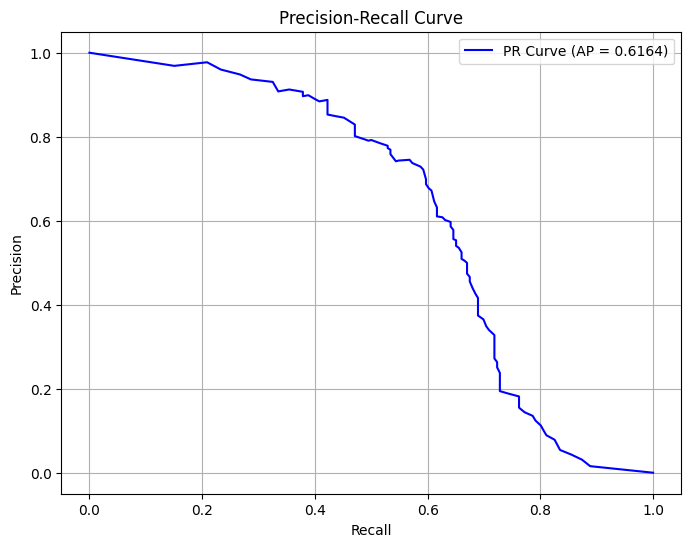

In [29]:
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve, average_precision_score

# Вычисление precision, recall и thresholds для PR-кривой
precision, recall, thresholds = precision_recall_curve(y_test, rf_pred_proba)
average_precision = average_precision_score(y_test, rf_pred_proba)

# Вывод площади под кривой
print(f'Area Under the Precision-Recall Curve (AP): {average_precision:.4f}')

# Построение графика
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, label=f'PR Curve (AP = {average_precision:.4f})', color='b')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='best')
plt.grid()
plt.show()


In [22]:
# LightGBM
lgb_model = LGBMClassifier(random_state=42)
lgb_model.fit(X_train_smote, y_train_smote)

# Предсказания и оценка
lgb_pred = lgb_model.predict(X_test)
lgb_pred_proba = lgb_model.predict_proba(X_test)[:, 1]

print("\nLightGBM Classification Report")
print(classification_report(y_test, lgb_pred))
print(f"ROC-AUC: {roc_auc_score(y_test, lgb_pred_proba):.4f}")


[LightGBM] [Info] Number of positive: 223679, number of negative: 745598
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.078248 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2805
[LightGBM] [Info] Number of data points in the train set: 969277, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.230769 -> initscore=-1.203975
[LightGBM] [Info] Start training from score -1.203975

LightGBM Classification Report
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    319543
         1.0       0.12      0.70      0.20       206

    accuracy                           1.00    319749
   macro avg       0.56      0.85      0.60    319749
weighted avg       1.00      1.00      1.00    319749

ROC-AUC: 0.9611


Area Under the Precision-Recall Curve (AP): 0.4258


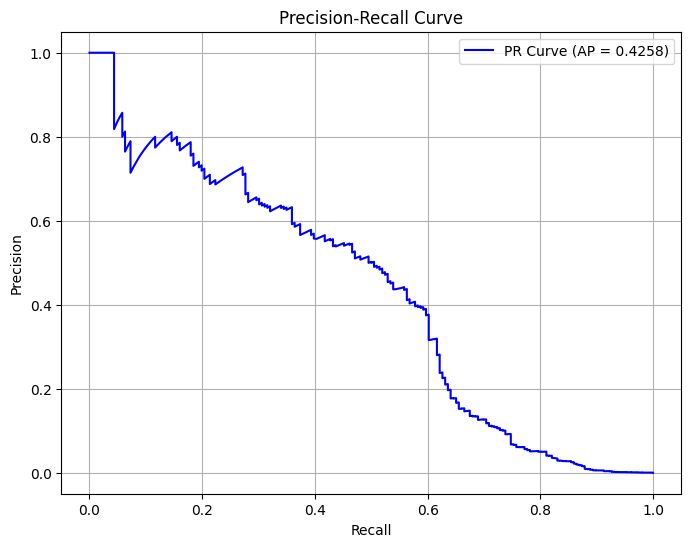

In [30]:
# Вычисление precision, recall и thresholds для PR-кривой
precision, recall, thresholds = precision_recall_curve(y_test, lgb_pred_proba)
average_precision = average_precision_score(y_test, lgb_pred_proba)

# Вывод площади под кривой
print(f'Area Under the Precision-Recall Curve (AP): {average_precision:.4f}')

# Построение графика
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, label=f'PR Curve (AP = {average_precision:.4f})', color='b')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='best')
plt.grid()
plt.show()


In [23]:
# XGBoost
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train_smote, y_train_smote)

# Предсказания и оценка
xgb_pred = xgb_model.predict(X_test)
xgb_pred_proba = xgb_model.predict_proba(X_test)[:, 1]

print("\nXGBoost Classification Report")
print(classification_report(y_test, xgb_pred))
print(f"ROC-AUC: {roc_auc_score(y_test, xgb_pred_proba):.4f}")


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [07:09:19] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



XGBoost Classification Report
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    319543
         1.0       0.19      0.66      0.29       206

    accuracy                           1.00    319749
   macro avg       0.59      0.83      0.65    319749
weighted avg       1.00      1.00      1.00    319749

ROC-AUC: 0.9639


Area Under the Precision-Recall Curve (AP): 0.5105


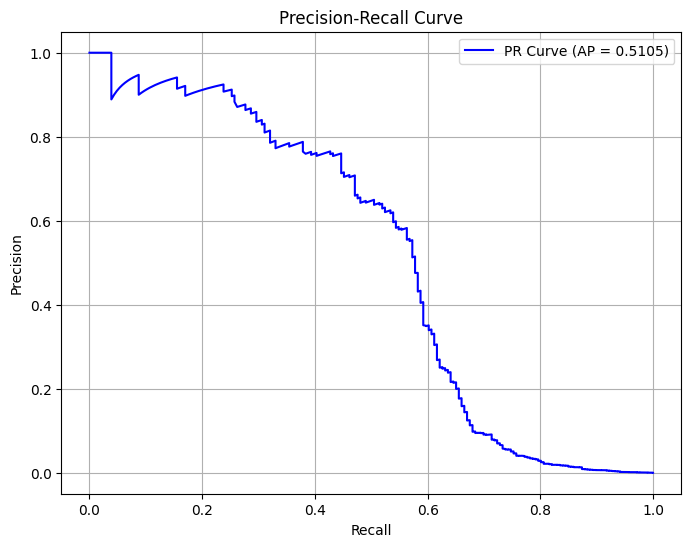

In [31]:
# Вычисление precision, recall и thresholds для PR-кривой
precision, recall, thresholds = precision_recall_curve(y_test, xgb_pred_proba)
average_precision = average_precision_score(y_test, xgb_pred_proba)

# Вывод площади под кривой
print(f'Area Under the Precision-Recall Curve (AP): {average_precision:.4f}')

# Построение графика
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, label=f'PR Curve (AP = {average_precision:.4f})', color='b')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='best')
plt.grid()
plt.show()

In [24]:
# CatBoost
cat_model = CatBoostClassifier(verbose=0, random_state=42)
cat_model.fit(X_train_smote, y_train_smote)

# Предсказания и оценка
cat_pred = cat_model.predict(X_test)
cat_pred_proba = cat_model.predict_proba(X_test)[:, 1]

print("\nCatBoost Classification Report")
print(classification_report(y_test, cat_pred))
print(f"ROC-AUC: {roc_auc_score(y_test, cat_pred_proba):.4f}")



CatBoost Classification Report
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    319543
         1.0       0.20      0.66      0.31       206

    accuracy                           1.00    319749
   macro avg       0.60      0.83      0.65    319749
weighted avg       1.00      1.00      1.00    319749

ROC-AUC: 0.9649


Area Under the Precision-Recall Curve (AP): 0.5179


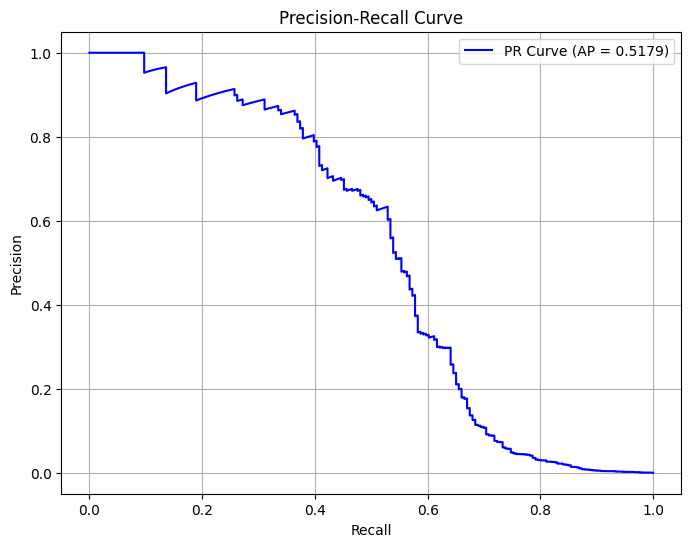

In [32]:
# Вычисление precision, recall и thresholds для PR-кривой
precision, recall, thresholds = precision_recall_curve(y_test,cat_pred_proba)
average_precision = average_precision_score(y_test, cat_pred_proba)

# Вывод площади под кривой
print(f'Area Under the Precision-Recall Curve (AP): {average_precision:.4f}')

# Построение графика
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, label=f'PR Curve (AP = {average_precision:.4f})', color='b')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='best')
plt.grid()
plt.show()

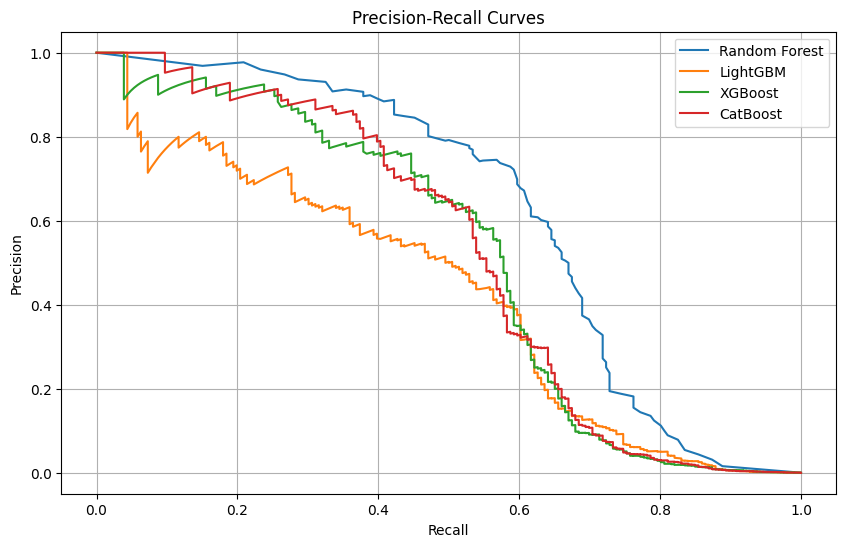

In [25]:
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve

# Вычисляем кривые для всех моделей
rf_precision, rf_recall, _ = precision_recall_curve(y_test, rf_pred_proba)
lgb_precision, lgb_recall, _ = precision_recall_curve(y_test, lgb_pred_proba)
xgb_precision, xgb_recall, _ = precision_recall_curve(y_test, xgb_pred_proba)
cat_precision, cat_recall, _ = precision_recall_curve(y_test, cat_pred_proba)

# Визуализация
plt.figure(figsize=(10, 6))
plt.plot(rf_recall, rf_precision, label='Random Forest')
plt.plot(lgb_recall, lgb_precision, label='LightGBM')
plt.plot(xgb_recall, xgb_precision, label='XGBoost')
plt.plot(cat_recall, cat_precision, label='CatBoost')
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curves")
plt.legend()
plt.grid()
plt.show()


In [26]:
# Считаем ROC-AUC для всех моделей
print(f"Random Forest ROC-AUC: {roc_auc_score(y_test, rf_pred_proba):.4f}")
print(f"LightGBM ROC-AUC: {roc_auc_score(y_test, lgb_pred_proba):.4f}")
print(f"XGBoost ROC-AUC: {roc_auc_score(y_test, xgb_pred_proba):.4f}")
print(f"CatBoost ROC-AUC: {roc_auc_score(y_test, cat_pred_proba):.4f}")


Random Forest ROC-AUC: 0.9409
LightGBM ROC-AUC: 0.9611
XGBoost ROC-AUC: 0.9639
CatBoost ROC-AUC: 0.9649
